In [67]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as  np

In [68]:
X, y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1, noise =20, random_state =13)

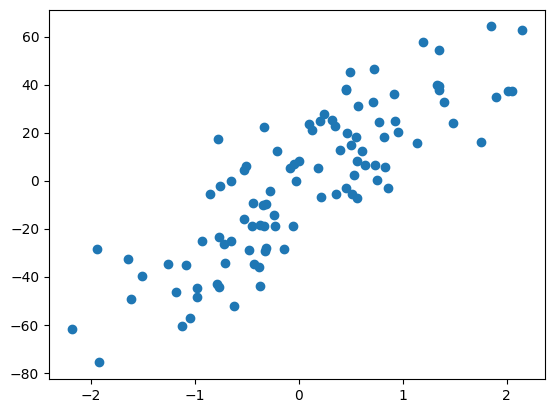

In [69]:
plt.scatter(X, y)

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [71]:
lr.fit(X, y)

LinearRegression()

In [72]:
lr.coef_, lr.intercept_

(array([27.82809103]), np.float64(-2.29474455867698))

In [73]:
from sklearn.linear_model import Ridge

In [74]:
rr = Ridge(alpha=0)
rr.fit(X, y)
rr.coef_, rr.intercept_

(array([27.82809103]), np.float64(-2.29474455867698))

In [75]:
rr = Ridge(alpha=10)
rr.fit(X, y)
rr.coef_, rr.intercept_

(array([24.9546267]), np.float64(-2.1269130035235735))

In [76]:
rr1 = Ridge(alpha=100)
rr1.fit(X, y)
rr1.coef_, rr1.intercept_

(array([12.93442104]), np.float64(-1.4248441496033308))

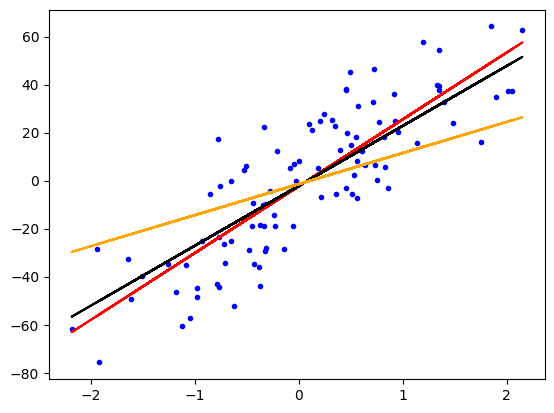

In [77]:
plt.plot(X, y, 'b.')
plt.plot(X, lr.predict(X), color='red')
plt.plot(X, rr.predict(X), color='black')
plt.plot(X, rr1.predict(X), color='orange')

In [78]:
#RIDGE REGRESSION CLASS FOR ONE DIMENSIONAL DATA

In [79]:
X, y

(array([[-0.71239066],
        [-0.43714566],
        [-0.45375238],
        [ 0.95283061],
        [ 0.23785784],
        [ 0.86121137],
        [-0.24332625],
        [ 0.18494595],
        [-0.72099967],
        [-0.42989708],
        [ 2.01522083],
        [ 0.39724133],
        [ 0.20780005],
        [-0.23242587],
        [-0.76862702],
        [ 0.45315861],
        [ 0.63988397],
        [ 0.3595323 ],
        [-1.61510796],
        [ 1.74924179],
        [-0.78898902],
        [-0.51196509],
        [-0.92833523],
        [ 2.15038297],
        [-0.2073497 ],
        [-1.63909341],
        [-0.33861825],
        [-0.32212366],
        [-0.48137142],
        [-0.52316421],
        [ 0.72196506],
        [ 0.76591105],
        [ 0.45348104],
        [-1.26160595],
        [-2.18711527],
        [-1.18541881],
        [ 0.21745166],
        [ 1.33031692],
        [-1.08718159],
        [ 0.56226171],
        [-1.51284512],
        [-0.00238903],
        [-0.27813452],
        [ 0

In [80]:
class Ridge_Reg_1D:
    def __init__(self, alpha = 0.001):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self, X, y):
        num = 0
        den = 0

        for i in range(X.size):
            num += (X[i]-X.mean())*(y[i]-y.mean())
            den += np.square((X[i]-X.mean()))

        self.m = num/(den+self.alpha) 
        self.b = y.mean() - self.m * X.mean()
        
    def predict(self, X):
        return self.m * X + self.b
            

In [81]:
My_rr = Ridge_Reg_1D(10)

In [82]:
My_rr.fit(X, y)

In [83]:
My_rr.m, My_rr.b

(array([24.9546267]), array([-2.126913]))

In [84]:
#RIDGE REGRESSION IMPLEMENTATION FOR N-DIMENSIONAL DATA

In [85]:
X, y = make_regression(n_samples = 100, n_features = 3, n_informative = 1, n_targets = 1, noise = 20 , random_state = 13)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)
X_train.shape, y_train.shape

((80, 3), (80,))

In [90]:
class Ridge_Reg_nD:
    def __init__(self, alpha  = 0.001):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1 , axis = 1)
        weights = np.dot( np.linalg.inv( np.dot(X_train.T, X_train) + self.alpha * np.identity(X_train.shape[1]) ), np.dot(X_train.T, y_train) )
        self.b = weights[0]
        self.m = weights[1:]
        
    def predict(self, X_test):
        return np.dot(X_test, self.m) + self.b

In [91]:
My_rr_N = Ridge_Reg_nD(10)

In [92]:
My_rr_N.fit(X_train, y_train)

In [93]:
My_rr_N.m, My_rr_N.b

(array([-0.49312605, 60.09131222,  0.6995107 ]),
 np.float64(-1.706122005318308))

In [94]:
rr2 = Ridge(10)

In [95]:
rr2.fit(X_train, y_train)

Ridge(alpha=10)

In [96]:
rr2.coef_, rr2.intercept_

(array([-0.49152918, 60.09425459,  0.69128928]),
 np.float64(-1.919794541806354))